# Financial Data Visualizer

### Monetary Base

Get all the dependency ready

In [1]:
import sys
!{sys.executable} -m pip install matplotlib >/dev/null 2>&1

import matplotlib.pyplot as plt
import urllib.request
import json
import ssl
context = ssl._create_unverified_context()

print("dependency ready")

dependency ready


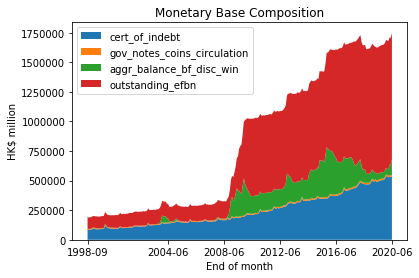

In [2]:
# Monetary Base Data released by hkma monthly
url = 'https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/monetary-operation/monetary-base-endperiod'

# retrieve data from hkma api, 100 entries per call, untill every data are retrieveed
records = []
offset = 0
while True:
    with urllib.request.urlopen(url+"?offset="+str(offset), context=context) as req:
        data = json.loads(req.read().decode())
        records += data['result']['records']
    if data['result']['datasize'] <= 0:
        break
    else:
        offset += 100
# now data retrieved from hkma are stored in 'records' in a chronological order
records.reverse()

# prepare formattedX and formattedY to plot a stacked area graph
formattedX = []
formatted_cert_of_indebt = []
formatted_gov_notes_coins_circulation = []
formatted_aggr_balance_bf_disc_win = []
formatted_outstanding_efbn = []
formattedY = []

for record in records:
    formattedX += [record['end_of_month']]

    # cert_of_indebt
    formatted_cert_of_indebt += [record['cert_of_indebt']]

    # gov_notes_coins_circulation
    formatted_gov_notes_coins_circulation += [
        record['gov_notes_coins_circulation']]

    # aggr_balance_bf_disc_win
    formatted_aggr_balance_bf_disc_win += [record['aggr_balance_bf_disc_win']]

    # outstanding_efbn
    formatted_outstanding_efbn += [record['outstanding_efbn']]

formattedY = [formatted_cert_of_indebt, formatted_gov_notes_coins_circulation,
              formatted_aggr_balance_bf_disc_win, formatted_outstanding_efbn]

# Plot
plt.stackplot(
    formattedX,
    formattedY,
    labels=['cert_of_indebt', 'gov_notes_coins_circulation', 'aggr_balance_bf_disc_win', 'outstanding_efbn']
)

# Setting Plot's meta data
plt.title("Monetary Base Composition")
plt.xlabel("End of month")
plt.ylabel("HK$ million")
plt.xticks(['2020-06', '2016-06', '2012-06', '2008-06', '2004-06', '1998-09'])
# plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()